# Credit Card: segmentation of clients

#### We develop a model that segments clients according to their credit card usage. 

We load the dataset and explore some of its statistics.

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.cluster import KMeans

In [2]:
data = pd.read_table('cc_general.csv', sep=',')
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [4]:
data.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [5]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


-----

We perfom a preprocess step. This is done in preparation for the later training step.

In [6]:
data = data.drop('CUST_ID', axis=1)
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [7]:
data = data.fillna(data.median())
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


-----

Here we define the dataset for training.

In [8]:
X = data.values

In [9]:
mu = np.mean(X, axis=0)
sigma = np.std(X, axis=0)

-----

Because the dataset is multivariate with several components, the segmentation via KMeans will be affected by 'the curse of dimensionality'. It is then necessary to perform a dimensional reduction step previous to that one. To do so, we first use PCA to pick the best reduction dimension and then we use an Autoencoder as our dimensional reduction final algorithm.

In [10]:
pca_grid = {}
for i in range(1,len(data.columns)):
    n_components = i
    pca = PCA(n_components=n_components)
    pca.fit(X)
    X_red = pca.transform(X)
    X_pred = pca.inverse_transform(X_red)
    loss = np.mean(np.mean(np.square(X-X_pred), axis=1), axis=0)
    pca_grid[n_components] = [pca, loss]

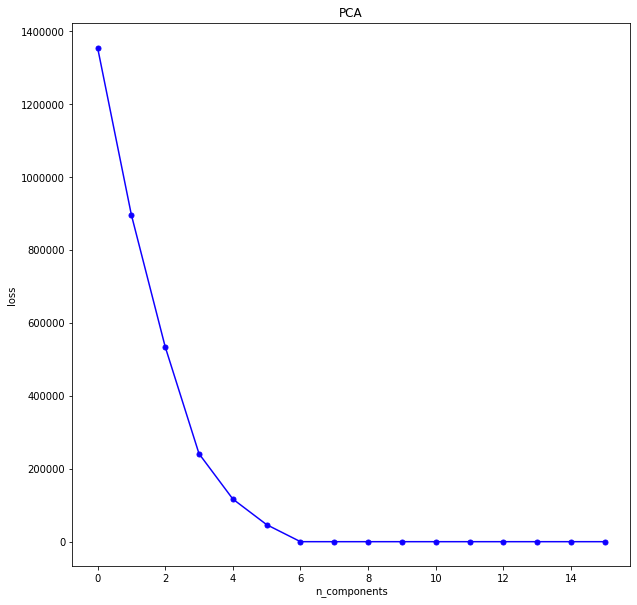

In [11]:
loss = [pca_grid[i][1] for i in range(1,len(data.columns))]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('PCA')
ax.set_xlabel('n_components')
ax.set_ylabel('loss')
ax.plot(loss, marker='.', color='#0F00FF', markersize=10, linestyle='-')

Here we see the best reduction dimension to use. We retrain PCA in this dimension to have a baseline score to beat with our Autoencoder.

In [12]:
pca = PCA(n_components=6)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [13]:
X_red = pca.transform(X)
X_pred = pca.inverse_transform(X_red)

In [14]:
np.mean(np.mean(np.square(X-X_pred), axis=1))

46682.1205840837

In [15]:
np.mean(np.mean(np.abs(X-X_pred), axis=1))

51.70374710820222

(array([8.751e+03, 1.550e+02, 2.300e+01, 1.200e+01, 4.000e+00, 3.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([3.61837664e+00, 4.27195463e+03, 8.54029088e+03, 1.28086271e+04,
        1.70769634e+04, 2.13452996e+04, 2.56136359e+04, 2.98819721e+04,
        3.41503084e+04, 3.84186446e+04, 4.26869809e+04]),
 <a list of 1 Patch objects>)

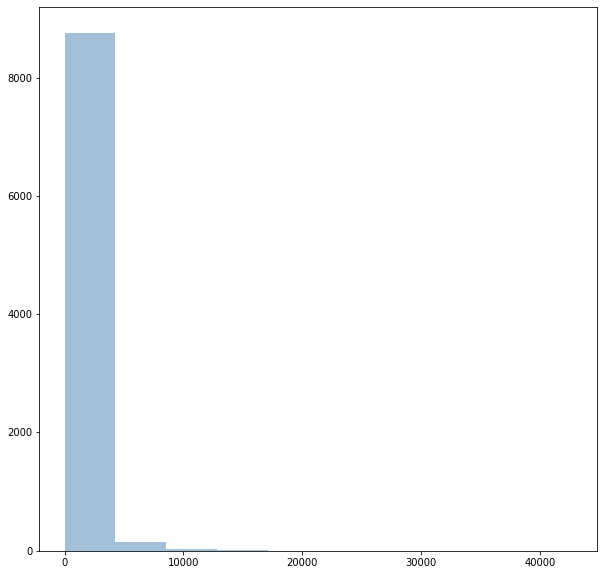

In [16]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.hist(np.sum(np.abs(X-X_pred), axis=1), bins=10, alpha=0.5, histtype='stepfilled', color='steelblue', edgecolor='none')

-----

Here we define our Autoencoder for dimensional reduction. We use the dimension obtained in previous steps.

In [17]:
def AE():
    model = tf.keras.models.Sequential()
    f1 = tf.keras.layers.Lambda(function=lambda x: (x-mu)/sigma)
    f2 = tf.keras.layers.Dense(units=128,
                               activation='tanh', 
                               kernel_initializer='he_uniform', 
                               bias_initializer='zeros')
    f3 = tf.keras.layers.Dense(units=128,
                               activation='tanh', 
                               kernel_initializer='he_uniform', 
                               bias_initializer='zeros')
    f4 = tf.keras.layers.Dense(units=6,
                               activation='tanh', 
                               kernel_initializer='he_uniform', 
                               bias_initializer='zeros')
    f5 = tf.keras.layers.Dense(units=128,
                               activation='tanh', 
                               kernel_initializer='he_uniform',
                               bias_initializer='zeros')
    f6 = tf.keras.layers.Dense(units=128,
                               activation='tanh', 
                               kernel_initializer='he_uniform', 
                               bias_initializer='zeros')
    f7 = tf.keras.layers.Dense(units=X.shape[1], 
                               activation='linear',
                               kernel_initializer='he_uniform',
                               bias_initializer='zeros')
    f8 = tf.keras.layers.Lambda(function=lambda x: x*sigma+mu)
    x0 = tf.keras.Input(shape=(X.shape[1]))
    x1 = f1(x0)
    x2 = f2(x1)
    x3 = f3(x2)
    x4 = f4(x3)
    x5 = f5(x4)
    x6 = f6(x5)
    x7 = f7(x6)
    x8 = f8(x7)
    ae = tf.keras.Model(x0, x8) 
    y0 = tf.keras.Input(shape=(X.shape[1]))
    y1 = f1(y0)
    y2 = f2(y1)
    y3 = f3(y2)
    y4 = f4(y3)
    encoder = tf.keras.Model(y0, y4)
    z0 = tf.keras.Input(shape=(6))
    z1 = f5(z0)
    z2 = f6(z1)
    z3 = f7(z2)
    z4 = f8(z3)
    decoder = tf.keras.Model(z0, z4)
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, 
                                         beta_1=0.9, 
                                         beta_2=0.999, 
                                         epsilon=1e-07)
    ae.compile(loss='mse', metrics=['mae'], optimizer=optimizer)
    ae.summary()
    callback1 = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', 
                                                     patience=100,
                                                     min_delta=0.001,
                                                     factor=0.1, 
                                                     min_lr=0.00001)
    callback2 = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                                 patience=200,
                                                 min_delta=0.001)
    ae.fit(X, X, epochs=1000, batch_size=64, callbacks=[callback1, callback2])
    return ae, encoder, decoder

In [18]:
ae, encoder, decoder = AE()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 17)]              0         
_________________________________________________________________
lambda (Lambda)              (None, 17)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               2304      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 774       
_________________________________________________________________
dense_3 (Dense)              (None, 128)               896       
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512 

8950/8950 [==============================] - 0s 29us/sample - loss: 37426.7663 - mae: 79.5209
Epoch 62/1000
8950/8950 [==============================] - 0s 29us/sample - loss: 35652.0142 - mae: 77.0436
Epoch 63/1000
8950/8950 [==============================] - 0s 28us/sample - loss: 36925.2067 - mae: 78.5741
Epoch 64/1000
8950/8950 [==============================] - 0s 28us/sample - loss: 30864.7751 - mae: 72.2523
Epoch 65/1000
8950/8950 [==============================] - 0s 28us/sample - loss: 33701.0124 - mae: 74.7942
Epoch 66/1000
8950/8950 [==============================] - 0s 29us/sample - loss: 37886.5821 - mae: 81.1921
Epoch 67/1000
8950/8950 [==============================] - 0s 31us/sample - loss: 47544.0102 - mae: 82.7809
Epoch 68/1000
8950/8950 [==============================] - 0s 28us/sample - loss: 55647.7939 - mae: 93.7581
Epoch 69/1000
8950/8950 [==============================] - 0s 29us/sample - loss: 65259.7410 - mae: 99.4248
Epoch 70/1000
8950/8950 [=================

8950/8950 [==============================] - 0s 30us/sample - loss: 19581.1121 - mae: 57.9234
Epoch 137/1000
8950/8950 [==============================] - 0s 30us/sample - loss: 21775.1849 - mae: 58.2045
Epoch 138/1000
8950/8950 [==============================] - 0s 30us/sample - loss: 47992.5569 - mae: 84.0792
Epoch 139/1000
8950/8950 [==============================] - 0s 30us/sample - loss: 45280.6997 - mae: 78.1278
Epoch 140/1000
8950/8950 [==============================] - 0s 28us/sample - loss: 22165.4553 - mae: 59.3460
Epoch 141/1000
8950/8950 [==============================] - 0s 30us/sample - loss: 12988.7417 - mae: 47.9270
Epoch 142/1000
8950/8950 [==============================] - 0s 30us/sample - loss: 14596.2779 - mae: 51.4544
Epoch 143/1000
8950/8950 [==============================] - 0s 29us/sample - loss: 11381.6638 - mae: 46.1728
Epoch 144/1000
8950/8950 [==============================] - 0s 30us/sample - loss: 10337.1016 - mae: 43.7163
Epoch 145/1000
8950/8950 [========

8950/8950 [==============================] - 0s 27us/sample - loss: 7624.9609 - mae: 37.9383
Epoch 212/1000
8950/8950 [==============================] - 0s 27us/sample - loss: 7319.9268 - mae: 36.6035
Epoch 213/1000
8950/8950 [==============================] - 0s 29us/sample - loss: 10525.6623 - mae: 43.6465
Epoch 214/1000
8950/8950 [==============================] - 0s 29us/sample - loss: 8530.4673 - mae: 38.9700
Epoch 215/1000
8950/8950 [==============================] - 0s 29us/sample - loss: 10856.1458 - mae: 44.7469
Epoch 216/1000
8950/8950 [==============================] - 0s 28us/sample - loss: 8499.2109 - mae: 39.7654
Epoch 217/1000
8950/8950 [==============================] - 0s 28us/sample - loss: 8765.6154 - mae: 40.1788
Epoch 218/1000
8950/8950 [==============================] - 0s 29us/sample - loss: 8576.1178 - mae: 41.2382
Epoch 219/1000
8950/8950 [==============================] - 0s 29us/sample - loss: 10162.5360 - mae: 42.2725
Epoch 220/1000
8950/8950 [==============

8950/8950 [==============================] - 0s 27us/sample - loss: 6178.9589 - mae: 33.6308
Epoch 287/1000
8950/8950 [==============================] - 0s 28us/sample - loss: 6285.8639 - mae: 35.2481
Epoch 288/1000
8950/8950 [==============================] - 0s 28us/sample - loss: 5960.8614 - mae: 33.0899
Epoch 289/1000
8950/8950 [==============================] - 0s 27us/sample - loss: 6683.4505 - mae: 35.7013
Epoch 290/1000
8950/8950 [==============================] - 0s 28us/sample - loss: 7000.1658 - mae: 36.9455
Epoch 291/1000
8950/8950 [==============================] - 0s 27us/sample - loss: 6942.0019 - mae: 36.6564
Epoch 292/1000
8950/8950 [==============================] - 0s 28us/sample - loss: 10177.5103 - mae: 43.4034
Epoch 293/1000
8950/8950 [==============================] - 0s 28us/sample - loss: 6729.7553 - mae: 35.7416
Epoch 294/1000
8950/8950 [==============================] - 0s 27us/sample - loss: 7050.0195 - mae: 37.6292
Epoch 295/1000
8950/8950 [================

8950/8950 [==============================] - 0s 30us/sample - loss: 4949.0041 - mae: 30.4330
Epoch 362/1000
8950/8950 [==============================] - 0s 27us/sample - loss: 5070.7567 - mae: 31.0075
Epoch 363/1000
8950/8950 [==============================] - 0s 26us/sample - loss: 5177.7234 - mae: 31.3534
Epoch 364/1000
8950/8950 [==============================] - 0s 25us/sample - loss: 5383.4207 - mae: 32.0564
Epoch 365/1000
8950/8950 [==============================] - 0s 26us/sample - loss: 5840.3769 - mae: 33.9331
Epoch 366/1000
8950/8950 [==============================] - 0s 27us/sample - loss: 7148.8181 - mae: 37.4990
Epoch 367/1000
8950/8950 [==============================] - 0s 28us/sample - loss: 5260.1990 - mae: 31.5512
Epoch 368/1000
8950/8950 [==============================] - 0s 26us/sample - loss: 4933.8175 - mae: 31.1755
Epoch 369/1000
8950/8950 [==============================] - 0s 27us/sample - loss: 5754.5976 - mae: 33.6825
Epoch 370/1000
8950/8950 [=================

8950/8950 [==============================] - 0s 28us/sample - loss: 6711.5071 - mae: 35.8971
Epoch 437/1000
8950/8950 [==============================] - 0s 27us/sample - loss: 9989.1045 - mae: 45.1126
Epoch 438/1000
8950/8950 [==============================] - 0s 27us/sample - loss: 10714.5474 - mae: 45.9752
Epoch 439/1000
8950/8950 [==============================] - 0s 27us/sample - loss: 10789.7484 - mae: 43.6193
Epoch 440/1000
8950/8950 [==============================] - 0s 28us/sample - loss: 8874.9156 - mae: 40.5286
Epoch 441/1000
8950/8950 [==============================] - 0s 28us/sample - loss: 8258.7478 - mae: 37.9267
Epoch 442/1000
8950/8950 [==============================] - 0s 27us/sample - loss: 7067.5072 - mae: 36.4166
Epoch 443/1000
8950/8950 [==============================] - 0s 28us/sample - loss: 52293.6635 - mae: 77.7785
Epoch 444/1000
8950/8950 [==============================] - 0s 32us/sample - loss: 60621.0445 - mae: 87.5813
Epoch 445/1000
8950/8950 [=============

8950/8950 [==============================] - 0s 26us/sample - loss: 8188.1349 - mae: 40.7726
Epoch 512/1000
8950/8950 [==============================] - 0s 26us/sample - loss: 6075.4346 - mae: 34.3969
Epoch 513/1000
8950/8950 [==============================] - 0s 28us/sample - loss: 6056.9720 - mae: 34.9631
Epoch 514/1000
8950/8950 [==============================] - 0s 27us/sample - loss: 6147.4736 - mae: 34.4119
Epoch 515/1000
8950/8950 [==============================] - 0s 26us/sample - loss: 6375.1664 - mae: 35.5518
Epoch 516/1000
8950/8950 [==============================] - 0s 25us/sample - loss: 5961.9740 - mae: 34.1136
Epoch 517/1000
8950/8950 [==============================] - 0s 27us/sample - loss: 5832.3996 - mae: 33.8777
Epoch 518/1000
8950/8950 [==============================] - 0s 26us/sample - loss: 5826.8587 - mae: 32.8753
Epoch 519/1000
8950/8950 [==============================] - 0s 26us/sample - loss: 5691.7199 - mae: 33.1674
Epoch 520/1000
8950/8950 [=================

Epoch 587/1000
8950/8950 [==============================] - 0s 27us/sample - loss: 10724.3619 - mae: 44.7670
Epoch 588/1000
8950/8950 [==============================] - 0s 27us/sample - loss: 8653.7394 - mae: 41.0477
Epoch 589/1000
8950/8950 [==============================] - 0s 27us/sample - loss: 9323.6431 - mae: 39.4119
Epoch 590/1000
8950/8950 [==============================] - 0s 30us/sample - loss: 34676.4600 - mae: 73.0713
Epoch 591/1000
8950/8950 [==============================] - 0s 27us/sample - loss: 38645.7424 - mae: 72.0272
Epoch 592/1000
8950/8950 [==============================] - 0s 28us/sample - loss: 16601.8096 - mae: 49.3094
Epoch 593/1000
8950/8950 [==============================] - 0s 31us/sample - loss: 10282.3421 - mae: 42.5678
Epoch 594/1000
8950/8950 [==============================] - 0s 29us/sample - loss: 6383.7074 - mae: 33.3269
Epoch 595/1000
8950/8950 [==============================] - 0s 26us/sample - loss: 4472.6111 - mae: 28.2777
Epoch 596/1000
8950/895

8950/8950 [==============================] - 0s 26us/sample - loss: 6125.5864 - mae: 35.4955
Epoch 663/1000
8950/8950 [==============================] - 0s 27us/sample - loss: 5966.3271 - mae: 34.8967
Epoch 664/1000
8950/8950 [==============================] - 0s 28us/sample - loss: 4916.6421 - mae: 30.7676
Epoch 665/1000
8950/8950 [==============================] - 0s 26us/sample - loss: 5257.7740 - mae: 31.8648
Epoch 666/1000
8950/8950 [==============================] - 0s 25us/sample - loss: 5995.5849 - mae: 34.9857
Epoch 667/1000
8950/8950 [==============================] - 0s 25us/sample - loss: 5770.3808 - mae: 33.8345
Epoch 668/1000
8950/8950 [==============================] - 0s 25us/sample - loss: 8042.2638 - mae: 40.8015
Epoch 669/1000
8950/8950 [==============================] - 0s 26us/sample - loss: 8493.8421 - mae: 40.9465
Epoch 670/1000
8950/8950 [==============================] - 0s 25us/sample - loss: 15120.1518 - mae: 50.7153
Epoch 671/1000
8950/8950 [================

8950/8950 [==============================] - 0s 27us/sample - loss: 2135.3349 - mae: 17.5670
Epoch 738/1000
8950/8950 [==============================] - 0s 26us/sample - loss: 2116.2906 - mae: 17.4763
Epoch 739/1000
8950/8950 [==============================] - 0s 25us/sample - loss: 2122.7117 - mae: 17.5682
Epoch 740/1000
8950/8950 [==============================] - 0s 25us/sample - loss: 2094.7222 - mae: 17.2481
Epoch 741/1000
8950/8950 [==============================] - 0s 25us/sample - loss: 2110.9316 - mae: 17.4326
Epoch 742/1000
8950/8950 [==============================] - 0s 25us/sample - loss: 2109.0868 - mae: 17.4487
Epoch 743/1000
8950/8950 [==============================] - 0s 26us/sample - loss: 2096.8485 - mae: 17.2397
Epoch 744/1000
8950/8950 [==============================] - 0s 25us/sample - loss: 2104.0207 - mae: 17.3363
Epoch 745/1000
8950/8950 [==============================] - 0s 25us/sample - loss: 2087.8539 - mae: 17.2406
Epoch 746/1000
8950/8950 [=================

8950/8950 [==============================] - 0s 26us/sample - loss: 1911.2730 - mae: 16.0136
Epoch 813/1000
8950/8950 [==============================] - 0s 25us/sample - loss: 1932.9480 - mae: 16.2217
Epoch 814/1000
8950/8950 [==============================] - 0s 26us/sample - loss: 1922.8762 - mae: 16.0889
Epoch 815/1000
8950/8950 [==============================] - 0s 26us/sample - loss: 1929.4870 - mae: 16.1796
Epoch 816/1000
8950/8950 [==============================] - 0s 27us/sample - loss: 1927.5039 - mae: 16.2226
Epoch 817/1000
8950/8950 [==============================] - 0s 27us/sample - loss: 1912.4792 - mae: 16.1832
Epoch 818/1000
8950/8950 [==============================] - 0s 27us/sample - loss: 1901.1203 - mae: 15.9460
Epoch 819/1000
8950/8950 [==============================] - 0s 27us/sample - loss: 1932.0212 - mae: 16.3260
Epoch 820/1000
8950/8950 [==============================] - 0s 27us/sample - loss: 1923.0718 - mae: 16.1590
Epoch 821/1000
8950/8950 [=================

Epoch 888/1000
8950/8950 [==============================] - 0s 27us/sample - loss: 1830.8054 - mae: 15.5457
Epoch 889/1000
8950/8950 [==============================] - 0s 27us/sample - loss: 1841.2945 - mae: 15.6401
Epoch 890/1000
8950/8950 [==============================] - 0s 27us/sample - loss: 1824.0639 - mae: 15.5818
Epoch 891/1000
8950/8950 [==============================] - 0s 27us/sample - loss: 1830.3759 - mae: 15.5802
Epoch 892/1000
8950/8950 [==============================] - 0s 26us/sample - loss: 1832.2720 - mae: 15.5755
Epoch 893/1000
8950/8950 [==============================] - 0s 27us/sample - loss: 1829.2338 - mae: 15.5762
Epoch 894/1000
8950/8950 [==============================] - 0s 25us/sample - loss: 1823.9218 - mae: 15.5184
Epoch 895/1000
8950/8950 [==============================] - 0s 26us/sample - loss: 1832.6161 - mae: 15.6315
Epoch 896/1000
8950/8950 [==============================] - 0s 25us/sample - loss: 1830.6465 - mae: 15.6012
Epoch 897/1000
8950/8950 [==

8950/8950 [==============================] - 0s 27us/sample - loss: 1760.7895 - mae: 15.0198
Epoch 964/1000
8950/8950 [==============================] - 0s 25us/sample - loss: 1750.8025 - mae: 14.9948
Epoch 965/1000
8950/8950 [==============================] - 0s 25us/sample - loss: 1781.1877 - mae: 15.2654
Epoch 966/1000
8950/8950 [==============================] - 0s 25us/sample - loss: 1783.7409 - mae: 15.3219
Epoch 967/1000
8950/8950 [==============================] - 0s 26us/sample - loss: 1764.4284 - mae: 15.1390
Epoch 968/1000
8950/8950 [==============================] - 0s 26us/sample - loss: 1772.0185 - mae: 15.1374
Epoch 969/1000
8950/8950 [==============================] - 0s 27us/sample - loss: 1767.6871 - mae: 15.1037
Epoch 970/1000
8950/8950 [==============================] - 0s 26us/sample - loss: 1777.8377 - mae: 15.2602
Epoch 971/1000
8950/8950 [==============================] - 0s 26us/sample - loss: 1751.6399 - mae: 14.9859
Epoch 972/1000
8950/8950 [=================

In [19]:
ae.evaluate(X,X)

8950/8950 [==============================] - 0s 35us/sample - loss: 1711.8777 - mae: 15.0720


[1711.8776738854094, 15.071975]

In [20]:
X_red = encoder.predict(X)
X_pred = ae.predict(X)

(array([8.721e+03, 1.960e+02, 2.200e+01, 6.000e+00, 2.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  38.31845201,  845.15879677, 1651.99914152, 2458.83948628,
        3265.67983104, 4072.5201758 , 4879.36052056, 5686.20086532,
        6493.04121007, 7299.88155483, 8106.72189959]),
 <a list of 1 Patch objects>)

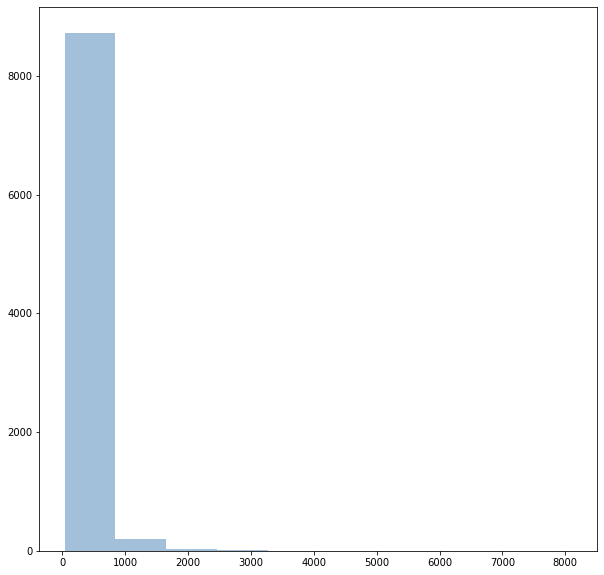

In [21]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.hist(np.sum(np.abs(X-X_pred), axis=1), bins=10, alpha=0.5, histtype='stepfilled', color='steelblue', edgecolor='none')

We see that our Autoencoder beats PCA, so we decide to use it as our dimensional reduction algorithm.

-----

Here we perform a grid search to select the number of clusters to use in KMeans. The grid used is constrained by common sense specifications.

In [22]:
kmeans_grid = {}
for i in range(1,20):
    n_clusters = 5*i
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X_red)
    X_clusters = kmeans.predict(X_red)
    X_centroids = kmeans.cluster_centers_[X_clusters,:]
    loss = np.mean(np.sum(np.square(X_red-X_centroids), axis=1))
    kmeans_grid[n_clusters] = [kmeans, loss]

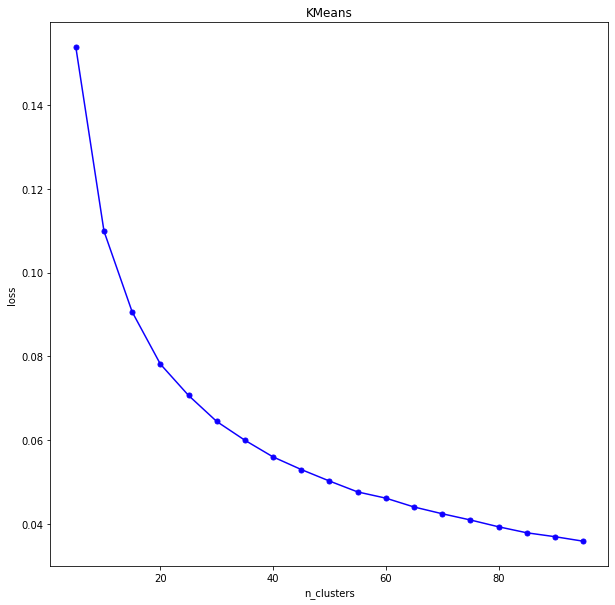

In [23]:
loss = [kmeans_grid[5*i][1] for i in range(1,20)]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('KMeans')
ax.set_xlabel('n_clusters')
ax.set_ylabel('loss')
ax.plot(5*np.array(range(1,20)), loss, marker='.', color='#0F00FF', markersize=10, linestyle='-')

From here and by common sense, we pick the number of clusters to use. We retrain KMeans with this information and pick this model as our final segmentation algorithm.

In [24]:
kmeans = KMeans(n_clusters=30)
kmeans.fit(X_red)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=30, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [25]:
data.loc[:,'CLUSTERS'] = kmeans.predict(X_red)
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTERS
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,5
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,23
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,20
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,20
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


-----

Finally, we show some clusters statistics.

In [26]:
data.query('CLUSTERS == 0').iloc[:,:-1].describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000
mean,1451.167413,0.973730,245.749841,165.542168,80.364166,345.997688,0.254894,0.126662,0.151295,0.148979,2.620616,5.352816,1798.459086,819.612133,532.895450,0.023748,11.669501
std,666.921811,0.106319,374.060746,282.484343,187.559254,432.805374,0.336481,0.215289,0.289595,0.155870,3.502516,8.932064,638.440808,635.961939,334.547431,0.103268,1.068014
min,0.271854,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,300.000000,0.000000,7.221665,0.000000,6.000000
25%,1026.220651,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1200.000000,397.388693,302.185679,0.000000,12.000000
50%,1376.244070,1.000000,50.000000,0.000000,0.000000,159.189426,0.083333,0.000000,0.000000,0.083333,2.000000,1.000000,1600.000000,587.264565,449.473659,0.000000,12.000000
75%,1794.531623,1.000000,372.160000,216.170000,62.100000,549.062884,0.416667,0.166667,0.166667,0.250000,4.000000,8.000000,2000.000000,1018.197785,666.121142,0.000000,12.000000
max,3406.473855,1.000000,2102.130000,1312.350000,1635.690000,2131.824562,1.000000,1.000000,1.000000,0.916667,38.000000,69.000000,4300.000000,3597.140559,2898.375147,1.000000,12.000000


In [27]:
data.query('CLUSTERS == 1').iloc[:,:-1].describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,6135.330204,0.998819,6961.808701,4796.423506,2165.385195,377.584099,0.932704,0.742129,0.785616,0.086580,1.818182,86.220779,12886.363636,4641.618378,1838.726739,0.077561,11.974026
std,2874.486176,0.010360,3015.460552,3128.429339,1536.871420,803.611851,0.151908,0.250297,0.313351,0.180075,4.630355,57.359812,2660.117681,3261.062687,1191.306005,0.241461,0.160101
min,627.260806,0.909091,3050.480000,507.000000,0.000000,0.000000,0.250000,0.083333,0.000000,0.000000,0.000000,5.000000,8500.000000,508.797444,198.065894,0.000000,11.000000
25%,3879.064446,1.000000,4795.490000,2396.600000,1084.770000,0.000000,0.916667,0.500000,0.666667,0.000000,0.000000,45.000000,11100.000000,2190.466875,1133.733957,0.000000,12.000000
50%,5970.705432,1.000000,6141.580000,3959.810000,1910.930000,0.000000,1.000000,0.833333,1.000000,0.000000,0.000000,73.000000,12500.000000,3318.260207,1659.775075,0.000000,12.000000
75%,8281.348085,1.000000,8710.720000,6402.630000,3018.640000,266.710051,1.000000,1.000000,1.000000,0.083333,1.000000,111.000000,14500.000000,6436.518476,2351.640064,0.000000,12.000000
max,13673.079610,1.000000,20421.590000,16864.560000,6866.690000,4134.316549,1.000000,1.000000,1.000000,0.833333,26.000000,274.000000,21000.000000,13002.303930,6340.898794,1.000000,12.000000


In [28]:
data.query('CLUSTERS == 2').iloc[:,:-1].describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000
mean,575.490831,0.836010,622.008674,238.552008,383.875795,209.585095,0.522602,0.196385,0.381226,0.051381,0.938131,12.491162,6094.702709,906.500719,241.795708,0.237976,11.789141
std,777.901879,0.263952,657.692407,288.330709,571.842093,507.835828,0.377532,0.275904,0.388261,0.121287,2.474131,18.066597,1036.065500,806.694715,192.333990,0.341273,0.886610
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000,0.000000,0.117036,0.000000,6.000000
25%,45.979111,0.727273,132.780000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,2.000000,5000.000000,376.952556,132.674692,0.000000,12.000000
50%,157.789605,1.000000,427.790000,121.450000,144.970000,0.000000,0.500000,0.083333,0.250000,0.000000,0.000000,7.000000,6000.000000,667.044827,179.932205,0.000000,12.000000
75%,900.307424,1.000000,905.037500,406.017500,511.680000,0.000000,1.000000,0.250000,0.750000,0.000000,0.000000,17.000000,7000.000000,1185.058396,306.785104,0.416667,12.000000
max,3543.905366,1.000000,4185.940000,1527.300000,3827.240000,3254.666530,1.000000,1.000000,1.000000,0.800000,20.000000,232.000000,8500.000000,5321.022187,1584.520204,1.000000,12.000000


#### Additional exploration of each clusters would be necessary to make a final conclusion about their relevance and their real meaning.